

```
2018IMT-050
Medhavi Srivastava
15/11/21
```





> **1. Considering the IRIS dataset discussed in previous assignment, apply EM algorithm to cluster the data (without considering the output labels) Use the same dataset for clustering using K-means algorithm. Compare the results of these two algorithms.**



In [313]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import numpy as np
import pandas as pd

In [314]:
#Loading dataset
iris=datasets.load_iris()
X=iris.data

Y=iris.target



> **KM**



In [315]:
#Define the model 

model_KM = KMeans(n_clusters=3, random_state= 3425)

In [316]:
#Train the model

model_KM.fit(X)

# KMeans Predictions
Y_Pred_KM = model_KM.labels_

Y_Pred_KM

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

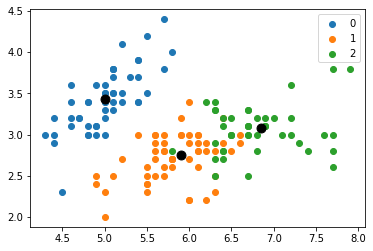

In [317]:
#Get the Centroids
centroids = model_KM.cluster_centers_
u_labels = np.unique(Y_Pred)
 
#plot the clustering results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [318]:
#Accuracy of KMean model 

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y,Y_Pred_KM)

print(cm)

from sklearn.metrics import accuracy_score

print(accuracy_score(Y,Y_Pred_KM))

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
0.8933333333333333




> **EM**



In [319]:
#Define EM Model(GMM)
from sklearn.mixture import GaussianMixture
model_EM=GaussianMixture(n_components=3, random_state = 3427)

#Training of the model

model_EM.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=3427, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [320]:
#Predicting classes for our data

Y_Pred_EM = model_EM.predict(X)

#Accuracy of EM Model

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y,Y_Pred_EM)

print(cm)

from sklearn.metrics import accuracy_score

print(accuracy_score(Y,Y_Pred_EM))

[[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]
0.9666666666666667


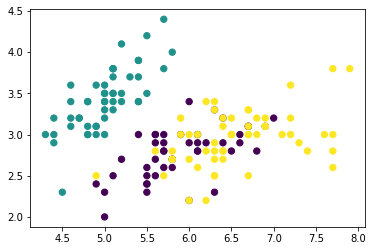

In [321]:
label = Y_Pred
plt.scatter(X[:, 0], X[:, 1], c=label, s=40, cmap='viridis');



> **2. Apply PCA algorithm to obtain first two principal components and perform the clustering using both algorithms on the resultant data.  Compare the results of these two algorithms.**




In [322]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
#from sklearn.preprocessing import standardScaler #
%matplotlib inline

In [323]:
df = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, sep=',')
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
print(df.isnull().values.any())

False


In [324]:
df.dropna(how="all", inplace=True)

In [325]:
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [326]:
X = df.iloc[:,0:4].values 
y = df.iloc[:,4].values

In [327]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [328]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [329]:
pca = PCA(n_components=2) 

In [330]:
from sklearn.preprocessing import StandardScaler 
X_std = StandardScaler().fit_transform(X)

In [331]:
principalComponents = pca.fit_transform(X_std) 
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [332]:
finalDf = pd.concat([principalDf,pd.DataFrame(y,columns = ['species'])], axis = 1) 
finalDf.head()

,principal component 1,principal component 2,species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


Text(0, 0.5, 'PCA 2')

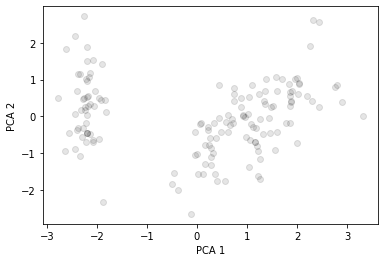

In [333]:
PCA_components = pd.DataFrame(principalComponents)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [334]:
reduced_data = PCA_components.iloc[:,:3]



> **K-Means after PCA**



In [335]:
model_KM=KMeans(n_clusters=3,random_state=3425)

In [336]:
Y_Pred_KM=model_KM.fit_predict(reduced_data)

In [337]:
#Y_Pred_KM=model_KM.labels_

Y_Pred_KM

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

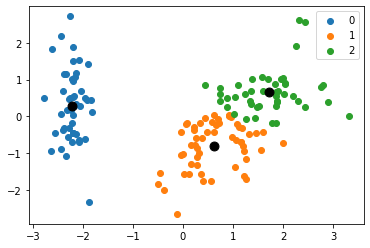

In [338]:
#Getting the Centroids
centroids = model_KM.cluster_centers_
label = Y_Pred_KM
u_labels = np.unique(Y_Pred_KM)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(principalComponents[label == i , 0] , principalComponents[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [339]:
#Accuracy of KMean model 

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y,Y_Pred_KM)

print(cm)

from sklearn.metrics import accuracy_score

print(accuracy_score(Y,Y_Pred_KM))

[[50  0  0]
 [ 0 39 11]
 [ 0 16 34]]
0.82




> **EM after PCA**



In [340]:
from sklearn.mixture import GaussianMixture
model_EM=GaussianMixture(n_components=3, random_state= 1900)

In [341]:
uu = model_EM.fit_predict(reduced_data)

In [342]:
#Accuracy of EM Model

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y,uu)

print(cm)

from sklearn.metrics import accuracy_score

print(accuracy_score(Y,uu))

[[50  0  0]
 [ 0 43  7]
 [ 0 12 38]]
0.8733333333333333


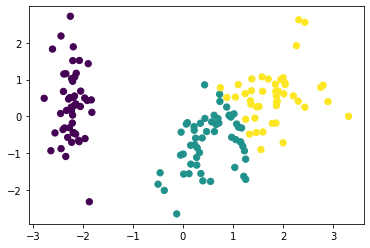

In [343]:
label = uu
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=label, s=40, cmap='viridis');